# Manipulating word embeddings

In [ ]:
import pandas as pd # Library for Dataframes 
import numpy as np # Library for math functions
import pickle # Python object serialization library. Not secure

word_embeddings = pickle.load( open( "word_embeddings_subset.p", "rb" ) )
len(word_embeddings) # there should be 243 words that will be used in this assignment

In [3]:
countryVector = word_embeddings['country'] # Get the vector representation for the word 'country'

In [4]:
#Get the vector for a given word:
def vec(w):
    return word_embeddings[w]

# 2D showing the Word to Vectors 

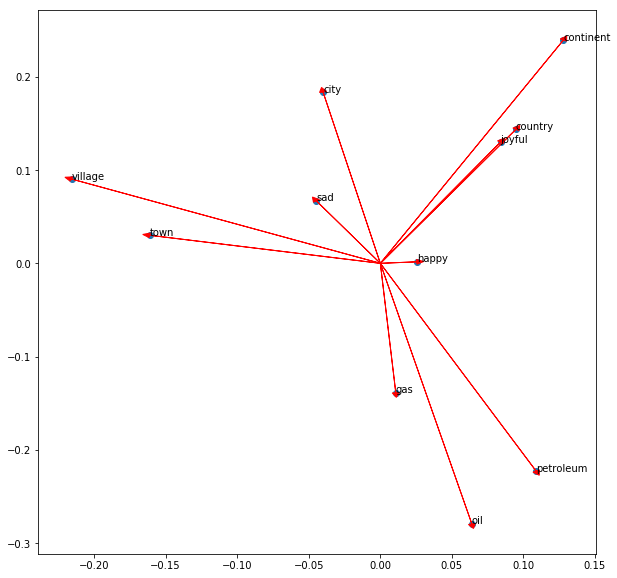

In [6]:
import matplotlib.pyplot as plt # Import matplotlib

words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']

bag2d = np.array([vec(word) for word in words]) # Convert each word to its vector representation

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

col1 = 3 # Select the column for the x axis
col2 = 2 # Select the column for the y axis

# Print an arrow for each word
for word in bag2d:
    ax.arrow(0, 0, word[col1], word[col2], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

    
ax.scatter(bag2d[:, col1], bag2d[:, col2]); # Plot a dot for each word

# Add the word label over each dot in the scatter plot
for i in range(0, len(words)):
    ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))


plt.show()

In [8]:
capital = vec('France') - vec('Paris')
country = vec('Madrid') + capital

diff = country - vec('Spain')

In [9]:
# Create a dataframe out of the dictionary embedding. This facilitate the algebraic operations
keys = word_embeddings.keys()
data = []
for key in keys:
    data.append(word_embeddings[key])

embedding = pd.DataFrame(data=data, index=keys)
# Define a function to find the closest word to a vector:
def find_closest_word(v, k = 1):
    # Calculate the vector difference from each word to the input vector
    diff = embedding.values - v 
    # Get the norm of each difference vector. 
    # It means the squared euclidean distance from each word to the input vector
    delta = np.sum(diff * diff, axis=1)
    # Find the index of the minimun distance in the array
    i = np.argmin(delta)
    # Return the row name for this item
    return embedding.iloc[i].name


In [14]:
print(find_closest_word(vec('Italy') - vec('Rome') + vec('Madrid')))
print(find_closest_word(vec('Berlin') + capital))
print(find_closest_word(vec('Beijing') + capital))
print(find_closest_word(vec('Lisbon') + capital))

Spain
Germany
China
Lisbon


# Sentence to Vector to closest Word

In [15]:
doc = "Spain petroleum city king"
vdoc = [vec(x) for x in doc.split(" ")]
doc2vec = np.sum(vdoc, axis = 0)

find_closest_word(doc2vec)

'petroleum'